In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [4]:
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# x_test=x_test.reshape(-1,784)
# x_test_noisy=x_test_noisy.reshape(-1,784)
# x_train_noisy=x_train_noisy.reshape(-1,784)
# x_train=x_train.reshape(-1,784)

In [6]:
x_test.shape

(10000, 28, 28)

In [9]:
# model=keras.Sequential() #Create a network sequence.

import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# # model.add(Input(shape=(784,)))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(64,activation = 'relu'))
# model.add(Dense(32,activation = 'relu'))
# model.add(Dense(64,activation = 'relu'))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(784,activation = 'sigmoid'))

# decoded.summary()

In [10]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
# model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy']) 
results= autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,validation_data=(x_test_noisy, x_test))



Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.2473 - accuracy: 0.7953 - val_loss: 0.1783 - val_accuracy: 0.7974
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1708 - accuracy: 0.7996 - val_loss: 0.1621 - val_accuracy: 0.7998
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1587 - accuracy: 0.8025 - val_loss: 0.1527 - val_accuracy: 0.8028
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1517 - accuracy: 0.8041 - val_loss: 0.1471 - val_accuracy: 0.8036
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1468 - accuracy: 0.8051 - val_loss: 0.1432 - val_accuracy: 0.8055
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1433 - accuracy: 0.8058 - val_loss: 0.1405 - val_accuracy: 0.8040
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1404 - accuracy: 0.8064 - val_loss: 0.1372 - val_accuracy: 0.8063
Epoch 

In [11]:
score = autoencoder.evaluate(x_test_noisy, x_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.1323 - accuracy: 0.8071


In [12]:
# x1=x_test.reshape(-1,28,28)
# x2=x_test_noisy.reshape(-1,28,28)
# x3=x_train.reshape(-1,28,28)
# x4=x_train_noisy.reshape(-1,28,28)

In [14]:
y_pred=autoencoder.predict(x_test_noisy)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

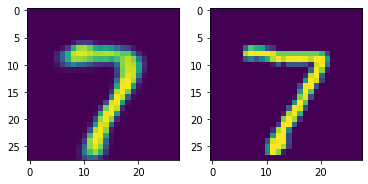

In [15]:
plt.subplot(1,2,1)
plt.imshow(y_pred[0].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(x_test[0].reshape(28,28))